Table split: 9 layers and 12 layers + SGD & RMS prop optimizers

In [2]:
import pandas as pd
import tensorflow as tf
from tensorflow import keras
from sklearn.model_selection import train_test_split
import datetime
from IPython.display import Image
import matplotlib.pyplot as plt
import numpy as np
from matplotlib import pyplot
from matplotlib.image import imread
from os import listdir
from tensorflow.keras.preprocessing.image import load_img
from tensorflow.keras.preprocessing.image import img_to_array
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from numpy import load
from sklearn.preprocessing import StandardScaler
import os
import zipfile
from tkinter import messagebox
from tkinter import filedialog
from tkinter import *

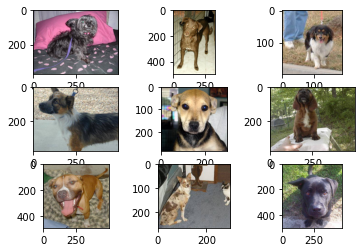

In [3]:
#extraction and preprocessing instruction from machine learning mastery

# plot dog photos from the dogs vs cats dataset

# define location of dataset
folder = 'catdogtrain/train/'
# plot first few images
for i in range(9):
	# define subplot
	pyplot.subplot(330 + 1 + i)
	# define filename
	filename = folder + 'dog.' + str(i) + '.jpg'
	# load image pixels
	image = imread(filename)
	# plot raw pixel data
	pyplot.imshow(image)
# show the figure
pyplot.show()

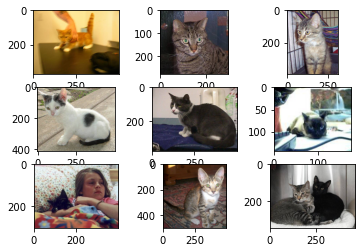

In [4]:

# plot cat photos from the dogs vs cats dataset
from matplotlib import pyplot
from matplotlib.image import imread
# define location of dataset
folder = 'catdogtrain/train/'
# plot first few images
for i in range(9):
	# define subplot
	pyplot.subplot(330 + 1 + i)
	# define filename
	filename = folder + 'cat.' + str(i) + '.jpg'
	# load image pixels
	image = imread(filename)
	# plot raw pixel data
	pyplot.imshow(image)
# show the figure
pyplot.show()

In [5]:
# define location of dataset
folder = 'catdogtrain/train/'
photos, labels = list(), list()
# enumerate files in the directory
for file in listdir(folder):
	# determine class
	output = 0.0
	if file.startswith('dog'):
		output = 1.0
	# load image
	photo = load_img(folder + file, target_size=(150, 150))
	# convert to numpy array
	photo = img_to_array(photo)
	photo = photo/255
	# store
	photos.append(photo)
	labels.append(output)
# convert to a numpy arrays
photos = np.asarray(photos)
labels = np.asarray(labels)
print(photos.shape, labels.shape)
# save the reshaped photos
np.save('dogs_vs_cats_photos.npy', photos)
np.save('dogs_vs_cats_labels.npy', labels)

(25000, 150, 150, 3) (25000,)


In [6]:
# define location of dataset
folder = 'catdogtest/test/'
test_photos = list()
#emerate files in the directory
for file in listdir(folder):
	# load image
	test_photo = load_img(folder + file, target_size=(150, 150))
	# convert to numpy array
	test_photo = img_to_array(test_photo)
	test_photo = test_photo/255
	# store
	test_photos.append(test_photo)
# convert to a numpy arrays
test_photos = np.asarray(test_photos)
print(test_photos.shape)
# save the reshaped photos
np.save('test_dogs_vs_cats_photos.npy', test_photos)

(12500, 150, 150, 3)


In [7]:
type(test_photos)

numpy.ndarray

In [8]:
x_train, x_val, y_train, y_val = train_test_split(photos, labels, test_size = 0.2, random_state = 42)


In [9]:
EPOCH = 5
BSIZE = 20
TSIZE = len(x_train)
VSIZE = len(x_val)

In [10]:
train_datagen = ImageDataGenerator(rescale = 1/255)
test_datagen = ImageDataGenerator(rescale = 1/255)

In [11]:
#VERY IMPORTANT, The path needs to be to a folder, that contains folders, that contains the images, 
#NOT the folder with the images itself

train_generator = train_datagen.flow_from_directory('catdogtrain', batch_size = 20, 
                                                    class_mode = 'binary', target_size = (150, 150))

Found 25000 images belonging to 1 classes.


In [12]:
train_generator


In [13]:
test_generator = test_datagen.flow_from_directory('catdogtest', batch_size = 20, 
                                                    class_mode = 'binary', target_size = (150, 150))

Found 12500 images belonging to 1 classes.


In [14]:
#build  cnn

callback = keras.callbacks.EarlyStopping(monitor = 'val_loss', patience = 1)
model = keras.models.Sequential([
    keras.layers.Conv2D(32, (3, 3), activation = 'relu', padding = 'same', input_shape = (150, 150, 3)),
    keras.layers.Conv2D(32, (3, 3), activation = 'relu', padding = 'same'),
    keras.layers.MaxPooling2D(2, 2),
    keras.layers.Conv2D(64, (3, 3), activation = 'relu', padding = 'same'),
    keras.layers.Conv2D(64, (3, 3), activation = 'relu', padding = 'same'),
    keras.layers.MaxPooling2D(2, 2),
    keras.layers.Conv2D(128, (3, 3), activation = 'relu', padding = 'same'),
    keras.layers.Conv2D(128, (3, 3), activation = 'relu', padding = 'same'),
    keras.layers.MaxPooling2D(2, 2),
    keras.layers.Conv2D(256, (3, 3), activation = 'relu', padding = 'same'),
    keras.layers.Conv2D(256, (3, 3), activation = 'relu', padding = 'same'),
    keras.layers.MaxPooling2D(2, 2),
    keras.layers.Conv2D(512, (3, 3), activation = 'relu', padding = 'same'),
    keras.layers.MaxPooling2D(2, 2),
    keras.layers.Flatten(), 
    keras.layers.Dense(512, activation = 'relu'),
    keras.layers.Dropout((0.4)),
    keras.layers.Dense(1, activation = 'sigmoid')
])

In [15]:
opt = keras.optimizers.RMSprop(learning_rate = 0.001)

In [16]:
model.compile(loss = "binary_crossentropy", 
             optimizer = opt, 
             metrics = ["binary_accuracy"])

In [17]:
#fit the data to the created model & time it

start=datetime.datetime.now()
m4 = model.fit(train_generator, epochs = 3, callbacks = [callback])
end=datetime.datetime.now()
print("Total Time Elapsed:", end-start)


#using the generators vs the train/val split from RAM produces an all cat assignment, will abandon generators for now

Epoch 1/3
1250/1250 [==============================] - 934s 747ms/step - loss: 5.5224e-04 - binary_accuracy: 0.9998
Epoch 2/3
1250/1250 [==============================] - 929s 743ms/step - loss: 0.0000e+00 - binary_accuracy: 1.0000
Epoch 3/3
1250/1250 [==============================] - 929s 743ms/step - loss: 0.0000e+00 - binary_accuracy: 1.0000
Total Time Elapsed: 0:46:35.064555


In [18]:
pred_4 = model.predict(test_generator)

pred_4

array([[0.],
       [0.],
       [0.],
       ...,
       [0.],
       [0.],
       [0.]], dtype=float32)

In [19]:
prediction_4 = np.hstack(pred_4)
prediction_4

df_sub_4 = pd.DataFrame({'label': prediction_4})

df_sub_4['id'] = id

df_sub_4 = df_sub_4[['id', 'label']]

df_sub_4.tail()
df_sub_4['label'].value_counts()

0.0    12500
Name: label, dtype: int64

In [20]:
#build  cnn


model = keras.models.Sequential([
    keras.layers.Conv2D(32, (3, 3), activation = 'relu', padding = 'same', input_shape = (150, 150, 3)),
    keras.layers.MaxPooling2D(2, 2),
    keras.layers.Conv2D(64, (3, 3), activation = 'relu', padding = 'same'),
    keras.layers.MaxPooling2D(2, 2),
    keras.layers.Flatten(), 
    keras.layers.Dense(512, activation = 'relu'),
    keras.layers.Dropout((0.4)),
    keras.layers.Dense(1, activation = 'sigmoid')
])

#small CNN, produced all the same results - likely need more complexity 

In [21]:
opt = keras.optimizers.RMSprop(learning_rate = 0.01)

In [22]:
model.compile(loss = "binary_crossentropy", 
             optimizer = opt, 
             metrics = ["binary_accuracy"])

In [23]:
start=datetime.datetime.now()
m3 = model.fit(x_train, y_train, epochs = 10, validation_data = (x_val, y_val))
end=datetime.datetime.now()
print("Total Time Elapsed:", end-start)



Epoch 1/10
625/625 [==============================] - 304s 486ms/step - loss: 5.5903 - binary_accuracy: 0.4990 - val_loss: 0.6931 - val_binary_accuracy: 0.5030
Epoch 2/10
625/625 [==============================] - 302s 484ms/step - loss: 0.9148 - binary_accuracy: 0.4989 - val_loss: 0.6934 - val_binary_accuracy: 0.4970
Epoch 3/10
625/625 [==============================] - 301s 481ms/step - loss: 0.7021 - binary_accuracy: 0.5107 - val_loss: 0.6933 - val_binary_accuracy: 0.4970
Epoch 4/10
625/625 [==============================] - 301s 481ms/step - loss: 0.6934 - binary_accuracy: 0.4981 - val_loss: 0.6937 - val_binary_accuracy: 0.4970
Epoch 5/10
625/625 [==============================] - 301s 481ms/step - loss: 0.6935 - binary_accuracy: 0.4911 - val_loss: 0.6931 - val_binary_accuracy: 0.5030
Epoch 6/10
625/625 [==============================] - 301s 481ms/step - loss: 0.6934 - binary_accuracy: 0.4994 - val_loss: 0.6935 - val_binary_accuracy: 0.4970
Epoch 7/10
625/625 [====================

In [26]:
pred_3 = model.predict(test_photos)

pred_3

array([[0.5183114],
       [0.5183114],
       [0.5183114],
       ...,
       [0.5183114],
       [0.5183114],
       [0.5183114]], dtype=float32)

In [27]:
prediction_3 = np.hstack(pred_3)
prediction_3

df_sub_3 = pd.DataFrame({'label': prediction_3})
df_sub_3.head()


label
0  0.518311
1  0.518311
2  0.518311
3  0.518311
4  0.518311

In [28]:
df_sub_3['id'] = id

df_sub_3 = df_sub_3[['id', 'label']]

df_sub_3.tail()
df_sub_3['label'].value_counts()

0.518311    12500
Name: label, dtype: int64

In [ ]:
df_sub_3.to_csv('Module_7_Submission_2.csv', index = False)

In [94]:
model = keras.models.Sequential()

model.add(keras.layers.Flatten(input_shape = [150, 150, 3]))
model.add(keras.layers.Dense(300, activation = 'relu'))
model.add(keras.layers.Dense(300, activation = 'relu'))
model.add(keras.layers.Dense(300, activation = 'relu'))
model.add(keras.layers.Dense(300, activation = 'relu'))
model.add(keras.layers.Dense(300, activation = 'relu'))
model.add(keras.layers.Dense(300, activation = 'relu'))
model.add(keras.layers.Dense(300, activation = 'relu'))
model.add(keras.layers.Dense(300, activation = 'relu'))
model.add(keras.layers.Dense(300, activation = 'relu'))
model.add(keras.layers.Dense(100, activation = 'relu'))
model.add(keras.layers.Dense(1, activation = 'sigmoid'))

#testing small regular NN to see what kind of results are achieved.

In [95]:
model.compile(loss = "binary_crossentropy", 
             optimizer = opt, 
             metrics = ["binary_accuracy"])

In [96]:
start=datetime.datetime.now()
m3 = model.fit(x_train, y_train, epochs = 3, validation_data = (x_val, y_val), callbacks = [callback])
end=datetime.datetime.now()
print("Total Time Elapsed:", end-start)



Epoch 1/3
625/625 [==============================] - 85s 136ms/step - loss: 2.4779 - binary_accuracy: 0.5033 - val_loss: 0.6932 - val_binary_accuracy: 0.4970
Epoch 2/3
625/625 [==============================] - 84s 134ms/step - loss: 0.7128 - binary_accuracy: 0.5020 - val_loss: 0.6931 - val_binary_accuracy: 0.5030
Epoch 3/3
625/625 [==============================] - 85s 135ms/step - loss: 0.7091 - binary_accuracy: 0.4985 - val_loss: 0.6931 - val_binary_accuracy: 0.5030
Total Time Elapsed: 0:04:14.172382


In [97]:
pred_5 = model.predict_classes(test_photos)

pred_5

array([[0],
       [0],
       [0],
       ...,
       [0],
       [0],
       [0]])

In [98]:
prediction_5 = np.hstack(pred_5)
prediction_5

df_sub_5 = pd.DataFrame({'label': prediction_5})

df_sub_5['id'] = id

df_sub_5 = df_sub_5[['id', 'label']]

df_sub_5.tail()
df_sub_5['label'].value_counts()

0    12496
1        4
Name: label, dtype: int64

In [29]:
#build  cnn

callback = keras.callbacks.EarlyStopping(monitor = 'val_loss', patience = 1)
model = keras.models.Sequential([
    keras.layers.Conv2D(32, (3, 3), activation = 'relu', padding = 'same', input_shape = (150, 150, 3)),
    keras.layers.Conv2D(32, (3, 3), activation = 'relu', padding = 'same'),
    keras.layers.MaxPooling2D(2, 2),
    keras.layers.Conv2D(64, (3, 3), activation = 'relu', padding = 'same'),
    keras.layers.Conv2D(64, (3, 3), activation = 'relu', padding = 'same'),
    keras.layers.MaxPooling2D(2, 2),
    keras.layers.Conv2D(128, (3, 3), activation = 'relu', padding = 'same'),
    keras.layers.Conv2D(128, (3, 3), activation = 'relu', padding = 'same'),
    keras.layers.MaxPooling2D(2, 2),
    keras.layers.Conv2D(256, (3, 3), activation = 'relu', padding = 'same'),
    keras.layers.Conv2D(256, (3, 3), activation = 'relu', padding = 'same'),
    keras.layers.MaxPooling2D(2, 2),
    keras.layers.Conv2D(512, (3, 3), activation = 'relu', padding = 'same'),
    keras.layers.MaxPooling2D(2, 2),
    keras.layers.Flatten(), 
    keras.layers.Dropout((0.4)),
    keras.layers.Dense(512, activation = 'relu'),
    keras.layers.Dropout((0.4)),
    keras.layers.Dense(1, activation = 'sigmoid')
])

#more complex CNN with decent enough results in Kaggle -- 4.xxx score, will work to improve upon this version for the 
#assignment table comparisson. 

In [30]:
opt = keras.optimizers.RMSprop(learning_rate = 0.001)

In [31]:
model.compile(loss = "binary_crossentropy", 
             optimizer = opt, 
             metrics = ["binary_accuracy"])

In [32]:
start=datetime.datetime.now()
m6 = model.fit(x_train, y_train, epochs = 30, validation_data = (x_val, y_val), callbacks = [callback])
end=datetime.datetime.now()
print("Total Time Elapsed:", end-start)



Epoch 1/30
625/625 [==============================] - 749s 1s/step - loss: 0.7626 - binary_accuracy: 0.5195 - val_loss: 0.6882 - val_binary_accuracy: 0.5244
Epoch 2/30
625/625 [==============================] - 754s 1s/step - loss: 0.7417 - binary_accuracy: 0.5663 - val_loss: 0.6610 - val_binary_accuracy: 0.6148
Epoch 3/30
625/625 [==============================] - 757s 1s/step - loss: 0.6281 - binary_accuracy: 0.6611 - val_loss: 0.5415 - val_binary_accuracy: 0.7324
Epoch 4/30
625/625 [==============================] - 758s 1s/step - loss: 0.5475 - binary_accuracy: 0.7284 - val_loss: 0.4715 - val_binary_accuracy: 0.7794
Epoch 5/30
625/625 [==============================] - 757s 1s/step - loss: 0.4755 - binary_accuracy: 0.7804 - val_loss: 0.4210 - val_binary_accuracy: 0.8058
Epoch 6/30
625/625 [==============================] - 756s 1s/step - loss: 0.4061 - binary_accuracy: 0.8219 - val_loss: 0.3355 - val_binary_accuracy: 0.8474
Epoch 7/30
625/625 [==============================] - 756s

In [33]:
pred_6 = model.predict(test_photos)

pred_6


array([[0.9954847 ],
       [0.07140401],
       [0.99027634],
       ...,
       [0.98788553],
       [0.17791227],
       [0.15216485]], dtype=float32)

In [34]:
prediction_6 = np.hstack(pred_6)
prediction_6

df_sub_6 = pd.DataFrame({'label': prediction_6})

id = np.array(range(1, 12501))

df_sub_6['id'] = id

df_sub_6 = df_sub_6[['id', 'label']]


df_sub_6['label'].value_counts()

1.000000e+00    706
9.999998e-01     36
9.999996e-01     28
9.999994e-01     21
9.999995e-01     20
               ... 
6.980565e-01      1
6.668051e-01      1
3.896770e-02      1
1.217253e-07      1
3.419984e-14      1
Name: label, Length: 11214, dtype: int64

In [35]:
df_sub_6.head(20)

id     label
0    1  0.995485
1    2  0.071404
2    3  0.990276
3    4  1.000000
4    5  0.878733
5    6  0.054802
6    7  0.008534
7    8  1.000000
8    9  0.793650
9   10  0.002008
10  11  0.774142
11  12  0.359995
12  13  0.007820
13  14  0.136857
14  15  0.862221
15  16  1.000000
16  17  0.999939
17  18  0.043435
18  19  0.091474
19  20  0.163156

In [36]:
df_sub_6.to_csv('Module_7_Submission_3.csv', index = False)

In [37]:
#build  cnn

callback = keras.callbacks.EarlyStopping(monitor = 'val_binary_accuracy', patience = 5)
model9 = keras.models.Sequential([
    keras.layers.Conv2D(32, (3, 3), activation = 'relu', padding = 'same', input_shape = (150, 150, 3)),
    keras.layers.Conv2D(32, (3, 3), activation = 'relu', padding = 'same'),
    keras.layers.MaxPooling2D(2, 2),
    keras.layers.Conv2D(64, (3, 3), activation = 'relu', padding = 'same'),
    keras.layers.Conv2D(64, (3, 3), activation = 'relu', padding = 'same'),
    keras.layers.MaxPooling2D(2, 2),
    keras.layers.Conv2D(128, (3, 3), activation = 'relu', padding = 'same'),
    keras.layers.Conv2D(128, (3, 3), activation = 'relu', padding = 'same'),
    keras.layers.MaxPooling2D(2, 2),
    keras.layers.Conv2D(256, (3, 3), activation = 'relu', padding = 'same'),
    keras.layers.Conv2D(256, (3, 3), activation = 'relu', padding = 'same'),
    keras.layers.MaxPooling2D(2, 2),
    keras.layers.Conv2D(512, (3, 3), activation = 'relu', padding = 'same'),
    keras.layers.Conv2D(512, (3, 3), activation = 'relu', padding = 'same'),
    keras.layers.MaxPooling2D(2, 2),
    keras.layers.Flatten(), 
    keras.layers.Dense(512, activation = 'relu'),
    keras.layers.Dropout((0.4)),
    keras.layers.Dense(128, activation = 'relu'),
    keras.layers.Dropout((0.4)),
    keras.layers.Dense(1, activation = 'sigmoid')
])




In [38]:
opt = keras.optimizers.RMSprop(learning_rate = 0.001)

In [39]:
model9.compile(loss = "binary_crossentropy", 
             optimizer = opt, 
             metrics = ["binary_accuracy"])

In [40]:
start=datetime.datetime.now()
m9 = model9.fit(x_train, y_train, epochs = 30, validation_data = (x_val, y_val), callbacks = [callback])
end=datetime.datetime.now()
print("Total Time Elapsed:", end-start)



Epoch 1/30
625/625 [==============================] - 859s 1s/step - loss: 1.1928 - binary_accuracy: 0.5076 - val_loss: 0.6932 - val_binary_accuracy: 0.4970
Epoch 2/30
625/625 [==============================] - 860s 1s/step - loss: 0.6934 - binary_accuracy: 0.5023 - val_loss: 0.6935 - val_binary_accuracy: 0.4970
Epoch 3/30
625/625 [==============================] - 828s 1s/step - loss: 0.6934 - binary_accuracy: 0.5032 - val_loss: 0.6932 - val_binary_accuracy: 0.5030
Epoch 4/30
625/625 [==============================] - 822s 1s/step - loss: 0.6934 - binary_accuracy: 0.4970 - val_loss: 0.6931 - val_binary_accuracy: 0.5030
Epoch 5/30
625/625 [==============================] - 819s 1s/step - loss: 0.6934 - binary_accuracy: 0.4977 - val_loss: 0.6931 - val_binary_accuracy: 0.5030
Epoch 6/30
625/625 [==============================] - 819s 1s/step - loss: 0.6933 - binary_accuracy: 0.4994 - val_loss: 0.6932 - val_binary_accuracy: 0.5030
Epoch 7/30
625/625 [==============================] - 819s

In [41]:
pred_7 = model9.predict(test_photos)

pred_7

#Ok adding another conv512 layer and adding another Dense128 produced trash, trying something new again
#all the same, does not help me

array([[0.5065279],
       [0.5065279],
       [0.5065279],
       ...,
       [0.5065279],
       [0.5065279],
       [0.5065279]], dtype=float32)

In [139]:
#build  cnn

callback = keras.callbacks.EarlyStopping(monitor = 'val_loss', patience = 5)
model = keras.models.Sequential([
    keras.layers.Conv2D(32, (3, 3), activation = 'relu', padding = 'same', input_shape = (150, 150, 3)),
    keras.layers.Conv2D(32, (3, 3), activation = 'relu', padding = 'same'),
    keras.layers.MaxPooling2D(2, 2),
    keras.layers.Conv2D(64, (3, 3), activation = 'relu', padding = 'same'),
    keras.layers.Conv2D(64, (3, 3), activation = 'relu', padding = 'same'),
    keras.layers.MaxPooling2D(2, 2),
    keras.layers.Conv2D(128, (3, 3), activation = 'relu', padding = 'same'),
    keras.layers.Conv2D(128, (3, 3), activation = 'relu', padding = 'same'),
    keras.layers.MaxPooling2D(2, 2),
    keras.layers.Conv2D(256, (3, 3), activation = 'relu', padding = 'same'),
    keras.layers.Conv2D(256, (3, 3), activation = 'relu', padding = 'same'),
    keras.layers.MaxPooling2D(2, 2),
    keras.layers.Conv2D(512, (3, 3), activation = 'relu', padding = 'same'),
    keras.layers.Conv2D(512, (3, 3), activation = 'relu', padding = 'same'),
    keras.layers.MaxPooling2D(2, 2),
    keras.layers.Conv2D(512, (3, 3), activation = 'relu', padding = 'same'),
    keras.layers.Conv2D(512, (3, 3), activation = 'relu', padding = 'same'),
    keras.layers.Flatten(), 
    keras.layers.Dropout((0.4)),
    keras.layers.Dense(512, activation = 'relu'),
    keras.layers.Dropout((0.4)),
    keras.layers.Dense(1, activation = 'sigmoid')
])


#Doing 9 layers and 12 layers with SGD instead of RMS prop for the table split

In [42]:
opt2 = keras.optimizers.SGD(learning_rate = 0.001, momentum = 0.9)

In [43]:
model.compile(loss = "binary_crossentropy", 
             optimizer = opt2, 
             metrics = ["binary_accuracy"])

In [ ]:
start=datetime.datetime.now()
m10 = model.fit(x_train, y_train, epochs = 30, validation_data = (x_val, y_val), callbacks = [callback])
end=datetime.datetime.now()
print("Total Time Elapsed:", end-start)


Epoch 1/30
625/625 [==============================] - 742s 1s/step - loss: 0.2137 - binary_accuracy: 0.9126 - val_loss: 0.2258 - val_binary_accuracy: 0.9022
Epoch 2/30
625/625 [==============================] - 749s 1s/step - loss: 0.1914 - binary_accuracy: 0.9214 - val_loss: 0.2132 - val_binary_accuracy: 0.9048
Epoch 3/30
625/625 [==============================] - 750s 1s/step - loss: 0.1738 - binary_accuracy: 0.9272 - val_loss: 0.2174 - val_binary_accuracy: 0.9098
Epoch 4/30
625/625 [==============================] - 751s 1s/step - loss: 0.1658 - binary_accuracy: 0.9302 - val_loss: 0.2137 - val_binary_accuracy: 0.9094
Epoch 5/30
625/625 [==============================] - 764s 1s/step - loss: 0.1566 - binary_accuracy: 0.9352 - val_loss: 0.2230 - val_binary_accuracy: 0.9094
Epoch 6/30
625/625 [==============================] - 774s 1s/step - loss: 0.1480 - binary_accuracy: 0.9411 - val_loss: 0.2174 - val_binary_accuracy: 0.9090
Epoch 7/30
 72/625 [==>...........................] - ETA: